In [1]:


%matplotlib inline




In [2]:
#format the book
import book_format
book_format.set_style()

ModuleNotFoundError: No module named 'book_format'

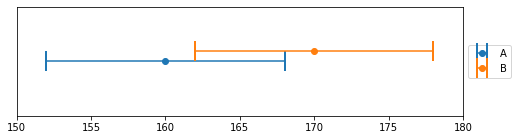

In [3]:
import kf_book.book_plots as book_plots
from kf_book.book_plots import plot_errorbars
plot_errorbars([(160, 8, 'A'), (170, 8, 'B')], xlims=(150, 180))

In [4]:
import numpy as np
measurements = np.random.uniform(160, 170, size=10000)
mean = measurements.mean()
print(f'Average of measurements is {mean:.4f}')

Average of measurements is 164.9479


In [5]:


mean = np.random.normal(165, 5, size=10000).mean()
print(f'Average of measurements is {mean:.4f}')



Average of measurements is 164.9946


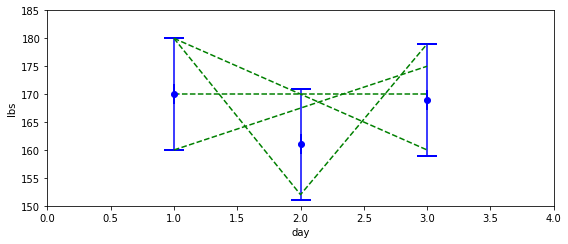

In [6]:
import kf_book.gh_internal as gh
gh.plot_hypothesis1()

In [7]:


from kf_book.book_plots import figsize
import matplotlib.pyplot as plt

weights = [158.0, 164.2, 160.3, 159.9, 162.1, 164.6, 
           169.6, 167.4, 166.4, 171.0, 171.2, 172.6]

time_step = 1.0  # day
scale_factor = 4.0/10

def predict_using_gain_guess(estimated_weight, gain_rate, do_print=False):     
    # storage for the filtered results
    estimates, predictions = [estimated_weight], []

    # most filter literature uses 'z' for measurements
    for z in weights: 
        # predict new position
        predicted_weight = estimated_weight + gain_rate * time_step

        # update filter 
        estimated_weight = predicted_weight + scale_factor * (z - predicted_weight)

        # save and log
        estimates.append(estimated_weight)
        predictions.append(predicted_weight)
        if do_print:
            gh.print_results(estimates, predicted_weight, estimated_weight)

    return estimates, predictions

initial_estimate = 160.
estimates, predictions = predict_using_gain_guess(
    estimated_weight=initial_estimate, gain_rate=1, do_print=True)     



previous estimate: 160.00, prediction: 161.00, estimate 159.80
previous estimate: 159.80, prediction: 160.80, estimate 162.16
previous estimate: 162.16, prediction: 163.16, estimate 162.02
previous estimate: 162.02, prediction: 163.02, estimate 161.77
previous estimate: 161.77, prediction: 162.77, estimate 162.50
previous estimate: 162.50, prediction: 163.50, estimate 163.94
previous estimate: 163.94, prediction: 164.94, estimate 166.80
previous estimate: 166.80, prediction: 167.80, estimate 167.64
previous estimate: 167.64, prediction: 168.64, estimate 167.75
previous estimate: 167.75, prediction: 168.75, estimate 169.65
previous estimate: 169.65, prediction: 170.65, estimate 170.87
previous estimate: 170.87, prediction: 171.87, estimate 172.16


[158.0,
 164.2,
 160.3,
 159.9,
 162.1,
 164.6,
 169.6,
 167.4,
 166.4,
 171.0,
 171.2,
 172.6]

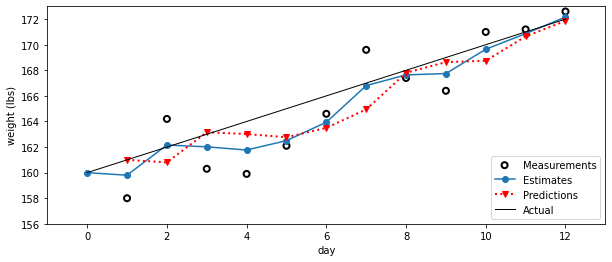

In [8]:
book_plots.set_figsize(10)
gh.plot_gh_results(weights, estimates, predictions, [160, 172])
weights


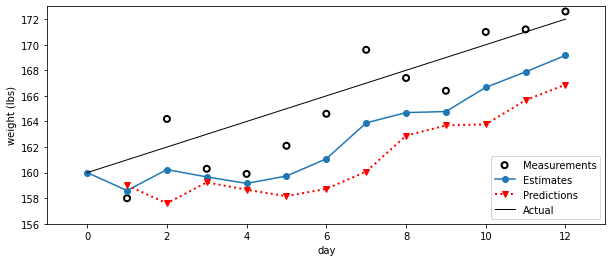

In [9]:


e, p = predict_using_gain_guess(initial_estimate, -1.)
gh.plot_gh_results(weights, e, p, [160, 172])



In [10]:
weight = 160.  # initial guess
gain_rate = -1.0  # initial guess

time_step = 1.
weight_scale = 4./10
gain_scale = 1./3
estimates = [weight]
predictions = []

for z in weights:
    # prediction step
    weight = weight + gain_rate*time_step
    gain_rate = gain_rate
    predictions.append(weight)
    
    # update step    
    residual = z - weight
    
    gain_rate = gain_rate + gain_scale   * (residual/time_step)
    weight    = weight    + weight_scale * residual
  
    estimates.append(weight)
    

In [11]:
estimates

[160.0,
 158.6,
 160.04,
 160.73066666666668,
 160.84151111111112,
 161.47418074074074,
 163.0623889382716,
 166.52785087736623,
 168.7511777483676,
 169.23478128817925,
 170.42001631600647,
 171.4044852273673,
 172.48700483172803]

In [12]:
import numpy as np


In [13]:
np.array(estimates)


array([160.        , 158.6       , 160.04      , 160.73066667,
       160.84151111, 161.47418074, 163.06238894, 166.52785088,
       168.75117775, 169.23478129, 170.42001632, 171.40448523,
       172.48700483])

In [31]:
def g_h_filter(data, x0, dx, g, h, dt):
    """
    Performs g-h filter on 1 state variable with a fixed g and h.

    'data' contains the data to be filtered.
    'x0' is the initial value for our state variable
    'dx' is the initial change rate for our state variable
    'g' is the g-h's g scale factor
    'h' is the g-h's h scale factor
    'dt' is the length of the time step 
    """
    #initialize
    estimate = x0
    estimates=np.array([x0])
    for meas in data:
        #print(meas)
        #predict
        estimate = estimate + dx*dt
        dx = dx
        #update
        residual = meas - estimate
        dx = dx + g * residual / dt
        estimate = estimate + h * residual
        #print(estimate)
        estimates = np.append(estimates, estimate)
    
    #print(estimates)
    return estimates

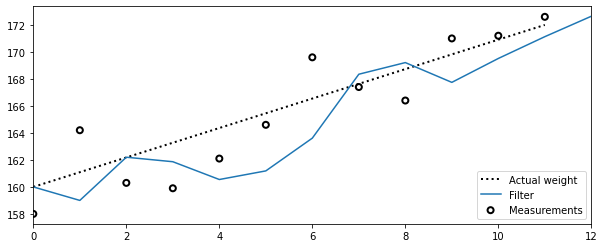

In [32]:
from kf_book.gh_internal import plot_g_h_results
book_plots.plot_track([0, 11], [160, 172], label='Actual weight')
data = g_h_filter(data=weights, x0=160., dx=1., g=6./10, h=2./3, dt=1.)
plot_g_h_results(weights, data)

In [21]:
estimates


[160.0,
 158.6,
 160.04,
 160.73066666666668,
 160.84151111111112,
 161.47418074074074,
 163.0623889382716,
 166.52785087736623,
 168.7511777483676,
 169.23478128817925,
 170.42001631600647,
 171.4044852273673,
 172.48700483172803]

In [22]:
data

array([160.])